In [16]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [21]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation1: str
    number3: int
    number4: int
    operation2: str
    finalNumber1: int
    finalNumber2: int

In [26]:
def adder1(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    
    state['finalNumber1'] = state['number1'] + state['number2']
    return state

def subtractor1(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    
    state['finalNumber1'] = state['number1'] - state['number2']
    return state

def decider1(state:AgentState) -> AgentState:
    """This node will select the next phase"""
    if state["operation1"] == "+":
        return "addition_operation1"
    
    elif state["operation1"] == "-":
        return "subtraction_operation1"  
    
def adder2(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def subtractor2(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state

def decider2(state: AgentState) -> AgentState:
    """This node will select the next node"""
    
    if state['operation2'] == "+":
        return "addition_operation2"
    elif state['operation2'] == "-":
        return "subtraction_operation2"

In [27]:
graph = StateGraph(AgentState)
graph.add_node("add_node1", adder1)
graph.add_node("subtract_node1", subtractor1)
graph.add_node("router1", lambda state:state)

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    decider1,
    {
        "addition_operation1": "add_node1",
        "subtraction_operation1": "subtract_node1"
    }
)

graph.add_edge("add_node1", "router2")
graph.add_edge("subtract_node1", "router2")

graph.add_conditional_edges(
    "router2",
    decider2,
    {
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()


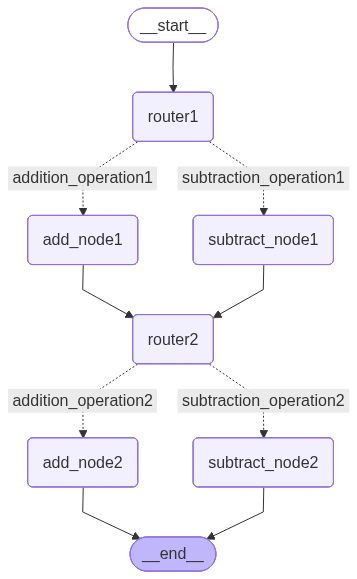

In [28]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
initial_state_1 = AgentState(number1= 10, number2= 7, operation1= "+", number3= 8, number4= 4, operation2= "-")
print(app.invoke(initial_state_1))

{'number1': 10, 'number2': 7, 'operation1': '+', 'number3': 8, 'number4': 4, 'operation2': '-', 'finalNumber1': 17, 'finalNumber2': 4}
